# Cluster

> Enzo Sergiani


## Librairies


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture

## Données


In [22]:
df = pd.read_csv("../../data/exam_data.csv", delimiter=",", decimal=".")

df.describe()

,X,Y
count,800.000000,800.000000
mean,10.809343,4.067838
std,5.360266,3.831002
min,0.000000,-5.029053
25%,6.504486,1.720596
50%,10.716147,4.707356
75%,15.288797,7.161121
max,21.677068,11.232087


Nos données ont pour coordonnées `X` et `Y` de taille 800.


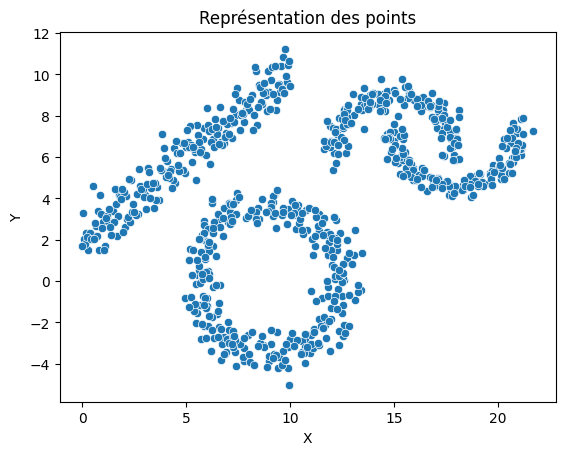

In [23]:
sns.scatterplot(data=df, x="X", y="Y")
plt.title("Représentation des points")
plt.show()

À l'œil nu, on peut constater la présence de 3 clusters. Nous allons utiliser cette valeur comme objectif de clustering et essayer de les prédire.


In [24]:
n_clusters = 3

## K-Means


In [25]:
kmeans = KMeans(n_clusters)
kmeans.fit(df)

df["Cluster"] = kmeans.labels_

df.head()

,X,Y,Cluster
0,6.776043,2.161305,2
1,7.537688,8.778988,2
2,17.667300,6.899375,0
3,17.049413,7.418676,0
4,6.589132,2.978855,2


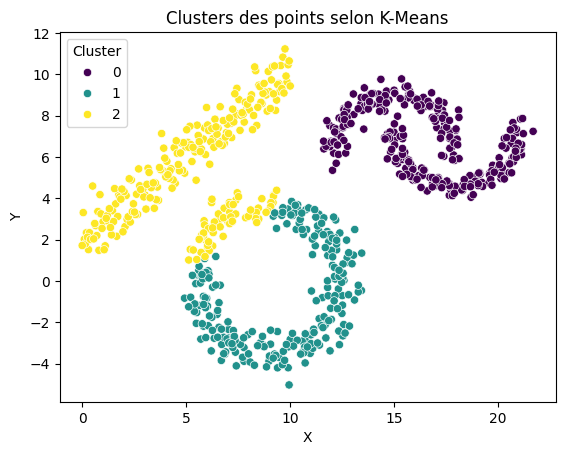

In [26]:
sns.scatterplot(data=df, x="X", y="Y", hue="Cluster", palette="viridis")
plt.title("Clusters des points selon K-Means")
plt.show()

On constate un nombre incorrect de blobs.


## Spectral Clustering


In [27]:
spectral = SpectralClustering(n_clusters)
spectral.fit(df)

df["Cluster"] = spectral.labels_

df.head()

,X,Y,Cluster
0,6.776043,2.161305,0
1,7.537688,8.778988,2
2,17.667300,6.899375,1
3,17.049413,7.418676,1
4,6.589132,2.978855,0


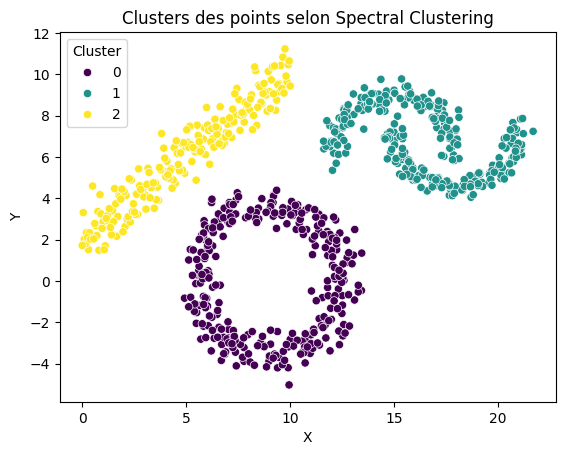

In [28]:
sns.scatterplot(data=df, x="X", y="Y", hue="Cluster", palette="viridis")
plt.title("Clusters des points selon Spectral Clustering")
plt.show()

On constate que les 3 clusters sont clairement identifiés.


## Gaussian Mixture


In [29]:
gaussian = GaussianMixture(n_components=n_clusters)
gaussian.fit(df)

df["Cluster"] = gaussian.predict(df)

df.head()

,X,Y,Cluster
0,6.776043,2.161305,0
1,7.537688,8.778988,2
2,17.667300,6.899375,1
3,17.049413,7.418676,1
4,6.589132,2.978855,0


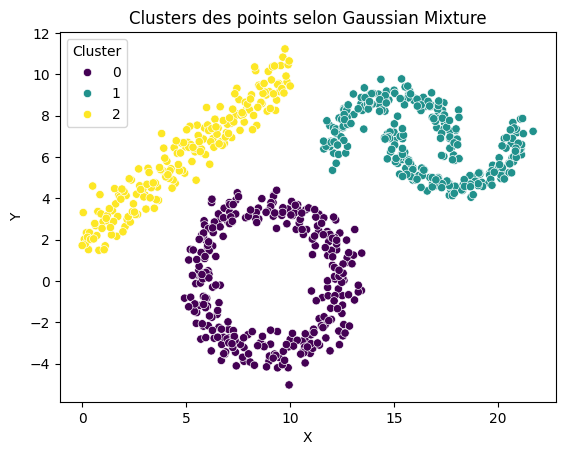

In [30]:
sns.scatterplot(data=df, x="X", y="Y", hue="Cluster", palette="viridis")
plt.title("Clusters des points selon Gaussian Mixture")
plt.show()

On constate que les 3 clusters sont clairement identifiés.


## Score


## Conclusion


On constate que les modèles Spectral Clustering et Gaussian Mixtures ont mieux identifier (d'un point de vue graphique) les trois clusters, contrairement à K-Means.
